In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Normalizer,\
StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn.decomposition import PCA

#### Import data

In [72]:
df = pd.read_excel('test.xlsx', header=0)

In [73]:
df.head(n=3)

,produkt,sklep,Tydzień,sprzedaż (szt.),cena,ekspozycja TYP1,ekspozycja TYP2,ekspozycja TYP3,ekspozycja TYP4,ekspozycja TYP5,ekspozycja TYP6,ekspozycja TYP7,ekspozycja TYP8,ekspozycja TYP9
0,p1,s211,2017-08-24,608,3.46543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,p1,s211,2017-08-31,548,3.37471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,p1,s211,2017-09-07,1062,2.90481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Change data names and order

In [74]:
df.columns = ['produkt','sklep','tydzien','sprzedaz','cena',
              'typ1','typ2','typ3','typ4','typ5','typ6','typ7','typ8','typ9',]

df = df[['sprzedaz', 'produkt','sklep','tydzien','cena',
         'typ1','typ2','typ3','typ4','typ5','typ6','typ7','typ8','typ9']]

In [75]:
df = df.sort_values(by='tydzien')

In [87]:
display(df.head(n=3))
display(df.tail(n=3))

,sprzedaz,produkt,sklep,tydzien,nr_tyg,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
261351,97.0,p8,s29,2017-08-17,33,2.672680,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
258335,202.0,p8,s234,2017-08-17,33,2.586931,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
82575,109.0,p3,s206,2017-08-17,33,1.717523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,sprzedaz,produkt,sklep,tydzien,nr_tyg,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
409238,27.0,p13,s37,2019-08-08,32,1.723333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96302,101.0,p3,s32,2019-08-08,32,2.188119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
413606,16.0,p13,s241,2019-08-08,32,1.833750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### zmienna nr tyg

In [86]:
weeks = [date.week for date in df['tydzien']]
df.insert(column='nr_tyg', loc=4, value=weeks)

In [88]:
df.duplicated().value_counts()

False    412567
dtype: int64

In [89]:
df = df.drop_duplicates()

In [90]:
df.duplicated().value_counts()

False    412567
dtype: int64

### Brakujące wartości

#### Zmienne numeryczne:
* sprzedaz: 413479, 413522 - brak wartości
* cena: 413521 - przecinek zamiast kropki
* typ ekspozycji od 1 do 9: ok


In [101]:
numerical = ['sprzedaz', 'cena', 'typ1','typ2','typ3',
             'typ4','typ5','typ6','typ7','typ8','typ9']

for var in numerical:
    var_num = pd.to_numeric(df[var], errors='coerce')
    if var_num.isnull().any():
        display(df[var_num.isnull()])
    else: print(var+': ok')

sprzedaz: ok
cena: ok
typ1: ok
typ2: ok
typ3: ok
typ4: ok
typ5: ok
typ6: ok
typ7: ok
typ8: ok
typ9: ok


#### Zmienne kategoryczne
* sklep: ok 
* produkt: ok

In [81]:
categorical = ['sklep', 'produkt']
    
for var in categorical:
    if df[var].isnull().any():
        display(df[var].isnull())
    else: print(var+': ok')

sklep: ok
produkt: ok


#### Zamiana numerycznych na typ float

In [82]:
for var in numerical:
    var_num = pd.to_numeric(df[var], errors='coerce')
    df[var] = var_num

* 413479, 413522 - uzupełnić podobnym
* 413521 - zmienić na kropkę

In [100]:
df[(df['produkt']=='p13') & (df['sklep']=='s241') & (df['nr_tyg']==52)]
df[(df['produkt']=='p13') & (df['sklep']=='s150') & (df['nr_tyg']==9)]

,sprzedaz,produkt,sklep,tydzien,nr_tyg,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
413427,42.0,p13,s150,2018-03-01,9,1.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
413479,42.0,p13,s150,2019-02-28,9,1.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
#df = df.drop([413479, 413522])
df['cena'][413521] = 1.69
df['sprzedaz'][[413522]]=17.0
df['sprzedaz'][[413479]]=42.0

C:\Users\Mikolaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mikolaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Mikolaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


#### Czy są wartości mniejsze od 0

In [108]:
for var in numerical:
    if (df[var]<0).any():
        display(df[df[var]<0])
    else: print(var + ': ok')

sprzedaz: ok
cena: ok
typ1: ok
typ2: ok
typ3: ok
typ4: ok
typ5: ok
typ6: ok
typ7: ok
typ8: ok
typ9: ok


* 413439 - uzupełnić podobnym
* 41357 - zmienić na 0

In [106]:
display(df[(df['produkt']=='p13') & (df['sklep']=='s241') & (df['nr_tyg']==47)])
df[(df['produkt']=='p13') & (df['nr_tyg']==21)]['sprzedaz'].median()

,sprzedaz,produkt,sklep,tydzien,nr_tyg,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
413517,13.0,p13,s241,2017-11-23,47,1.690000,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
413569,17.0,p13,s241,2018-11-22,47,1.866471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


86.0

In [107]:
df['typ2'][413517] = 0
df['sprzedaz'][413439] = 86.0

C:\Users\Mikolaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mikolaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [109]:
for var in numerical:
    if (df[var]<0).any():
        display(df[df[var]<0])
    else: print(var + ': ok')

sprzedaz: ok
cena: ok
typ1: ok
typ2: ok
typ3: ok
typ4: ok
typ5: ok
typ6: ok
typ7: ok
typ8: ok
typ9: ok


#### Czy ilość ekspozycji danego typu jest int

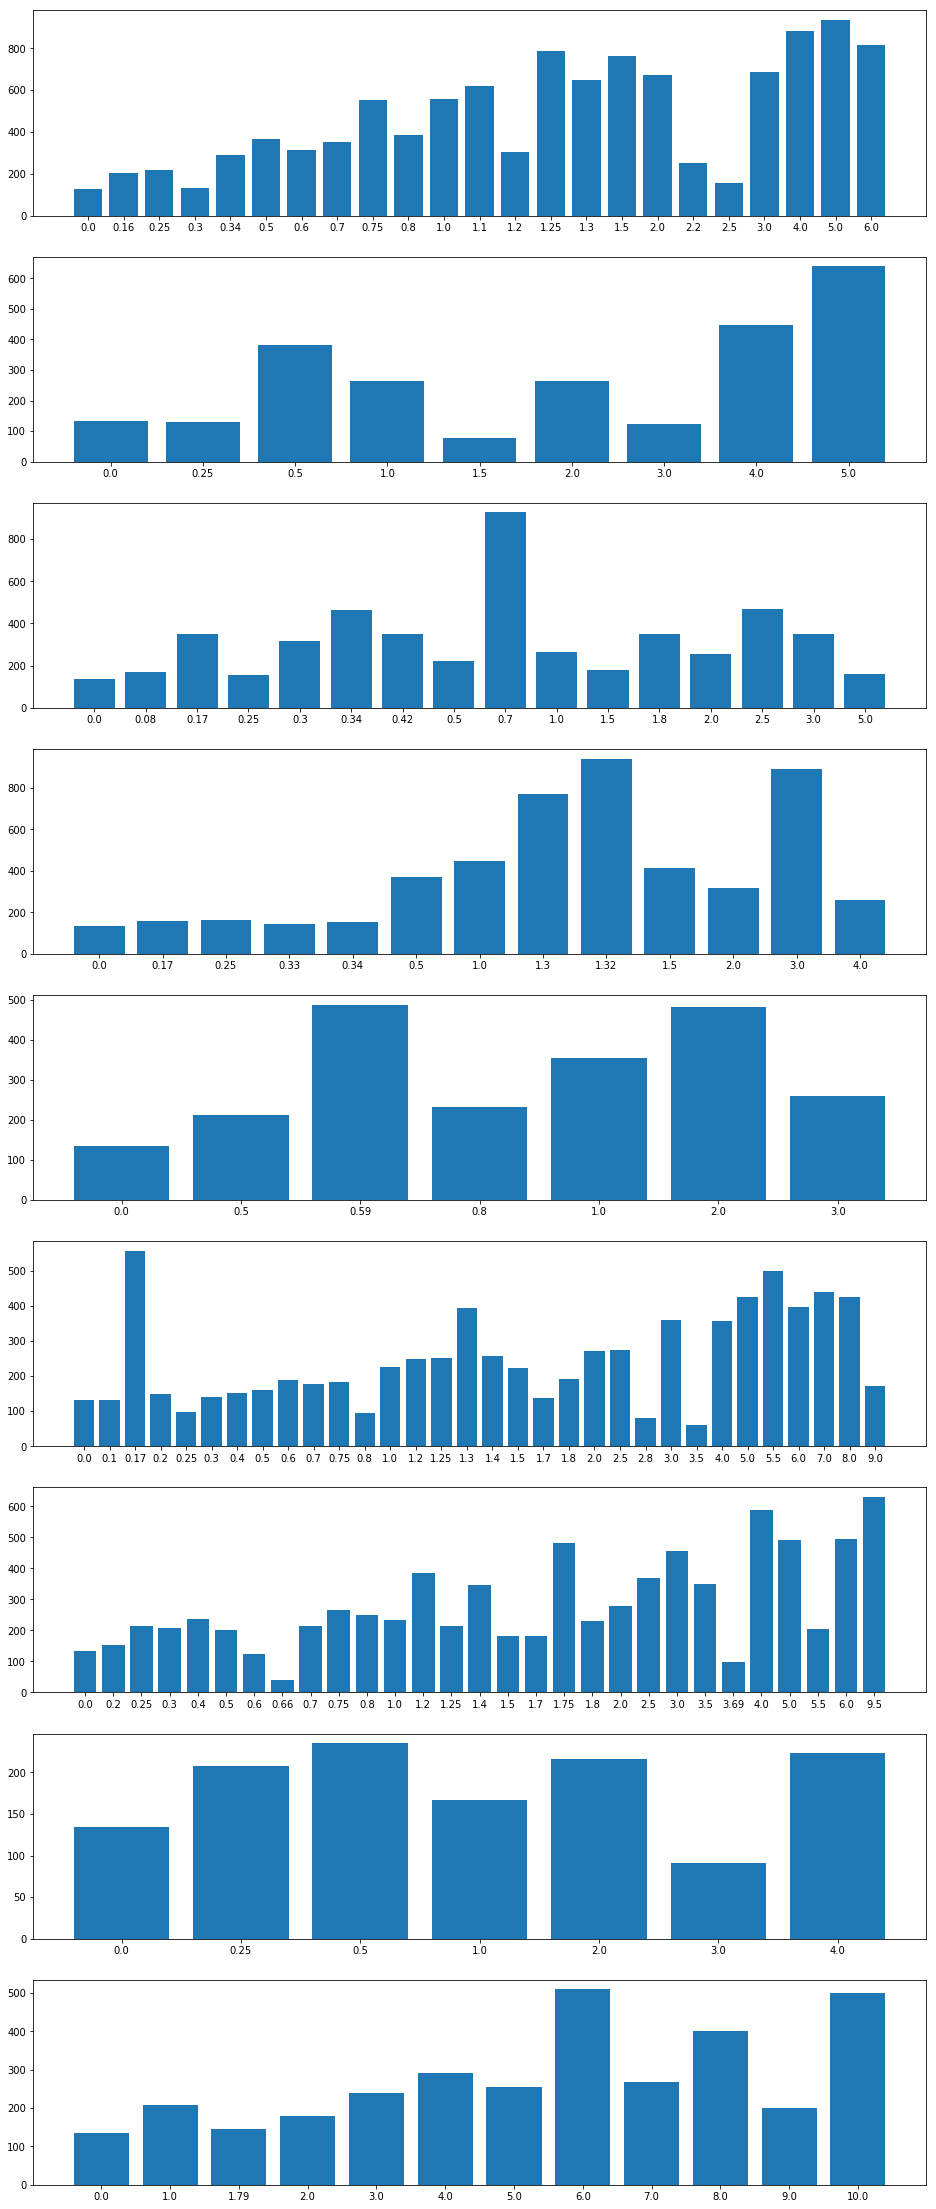

In [19]:
zero = df['sprzedaz'][df['typ7']==0].median()
jeden = df['sprzedaz'][df['typ7']==1].median()
dwa = df['sprzedaz'][df['typ7']==2].median()

heights, e_number = [], []

for typ in range(1, 10):
    h, n = [], []
    for e in np.unique(df['typ' + str(typ)]):
        h.append(df['sprzedaz'][df['typ' + str(typ)]==e].mean())
        n.append(str(e))
    heights.append(h)
    e_number.append(n)
    
fig, ax = plt.subplots(nrows=9)
for bar in range(0, 9):
    ax[bar].bar(e_number[bar], heights[bar])
fig.set_size_inches([16,40])

#### nie int w ilości ekspozycji - usunąć

In [544]:
selects = []
for typ in range(1, 10):
    l = []
    for n in range(0, 11):
        t = df['typ' + str(typ)] == n
        l.append(t)
    select = l[0]|l[1]|l[2]|l[3]|l[4]|l[5]|l[6]|l[7]|l[8]|l[9]|l[10]
    selects.append(select)

In [545]:
final_select = selects[0]&selects[1]&selects[2]&selects[3]&selects[4]&selects[5]&selects[6]&selects[7]&selects[8] 

In [546]:
final_select.value_counts()

True     411748
False       816
dtype: int64

In [547]:
'''df = df[final_select]'''

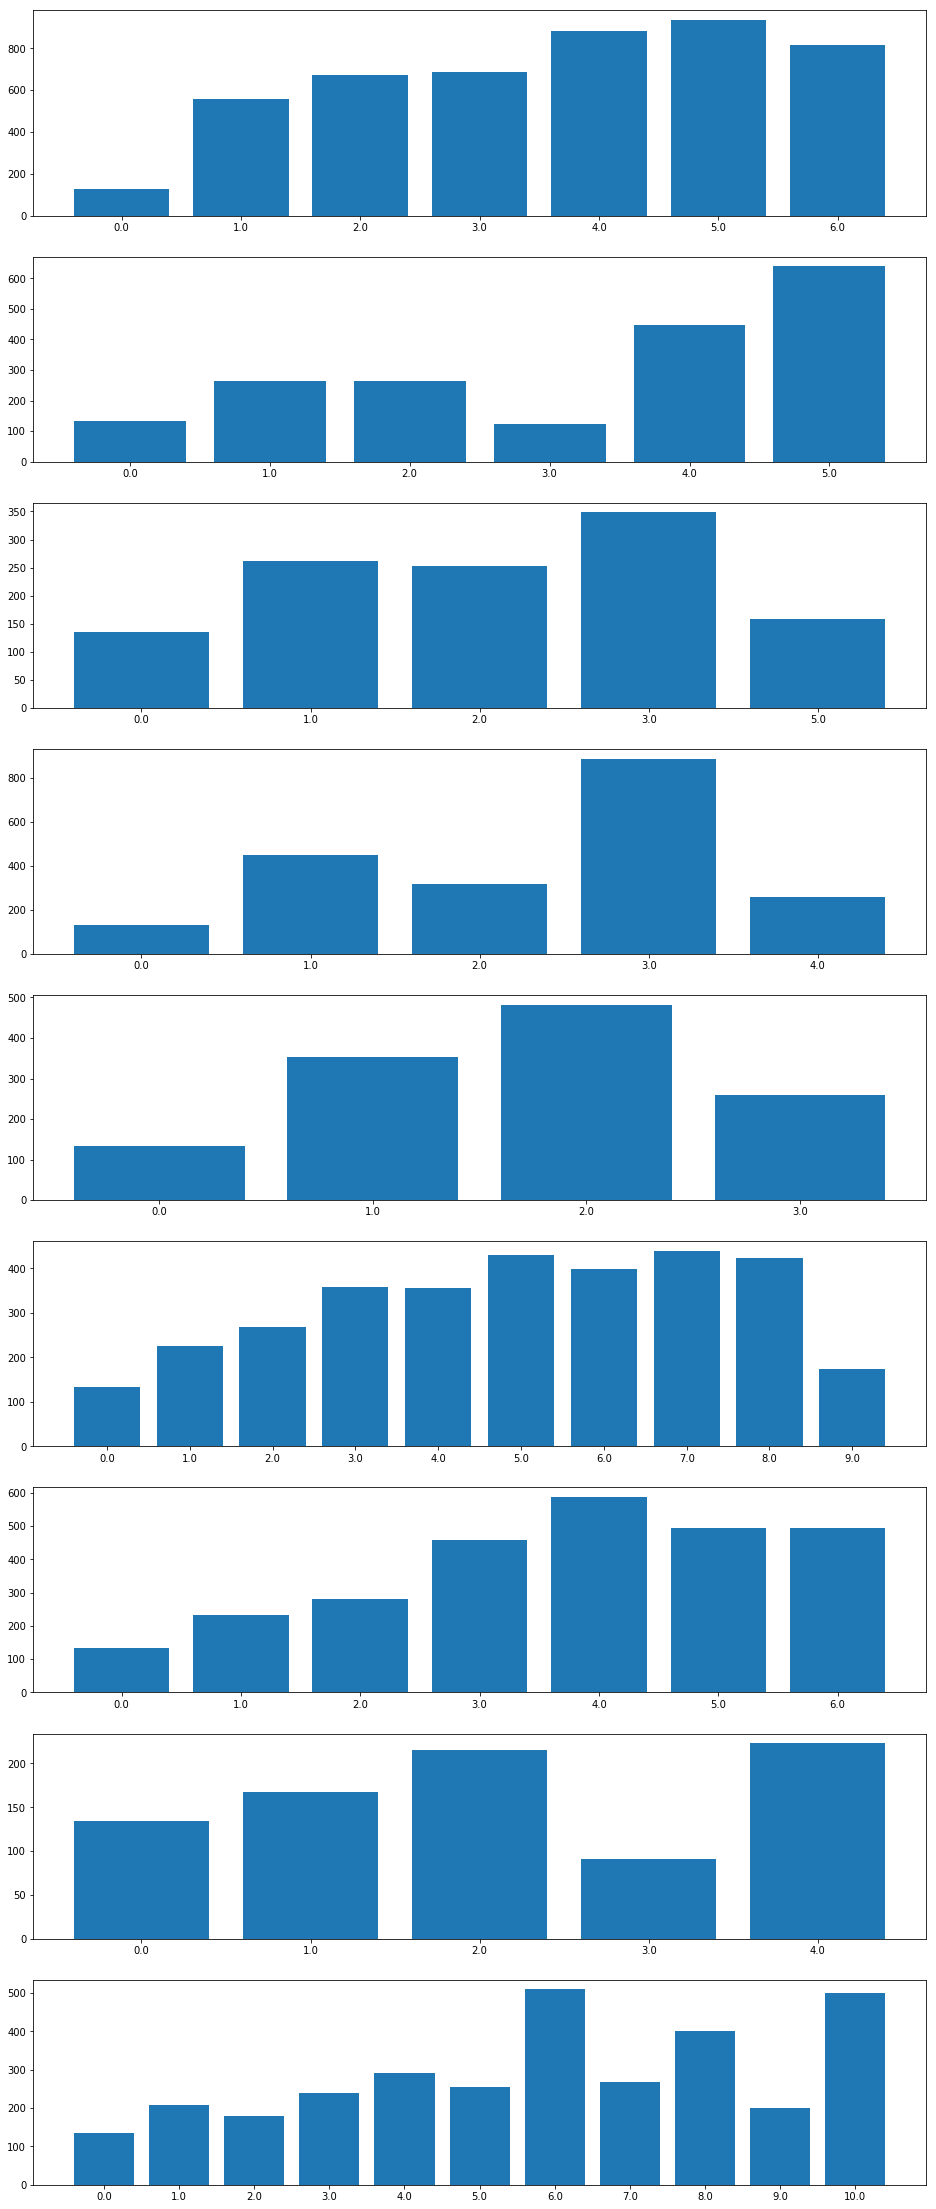

In [548]:
heights, e_number = [], []

for typ in range(1, 10):
    h, n = [], []
    for e in np.unique(df['typ' + str(typ)]):
        h.append(df['sprzedaz'][df['typ' + str(typ)]==e].mean())
        n.append(str(e))
    heights.append(h)
    e_number.append(n)
    
fig, ax = plt.subplots(nrows=9)
for bar in range(0, 9):
    ax[bar].bar(e_number[bar], heights[bar])
fig.set_size_inches([16,40])

#### sklep, produkt

In [110]:
print(np.unique(df['sklep']).shape[0])
print(np.unique(df['produkt']).shape[0])

343
13


#### cena outliers

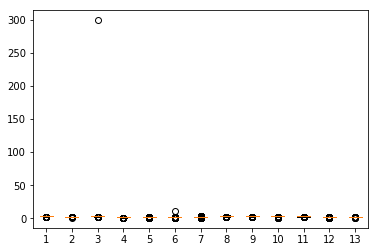

In [111]:
produkt_cena = [df['cena'][df['produkt']==p] for p in df['produkt'].unique()]
plt.boxplot(produkt_cena)
plt.show()

In [112]:
df['cena'].nlargest(n=5)

227       299.000000
413397     10.400000
134363      4.650000
109403      4.584903
120115      4.574483
Name: cena, dtype: float64

#### zamienic 299 i 10.40 na mediane

In [131]:
display(df[df['cena']==10.40])
display(df[df['cena']==299])

,sprzedaz,produkt,sklep,tydzien,nr_tyg,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
413397,26.0,p13,s145,2019-08-01,31,10.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,sprzedaz,produkt,sklep,tydzien,nr_tyg,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
227,488.0,p1,s90,2018-01-04,1,299.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
display(df[(df['produkt']=='p13') & (df['nr_tyg']==31)]['cena'].median())
df[(df['produkt']=='p1') & (df['nr_tyg']==1)]['cena'].median()

1.87963636363636

3.004730357142855

In [138]:
df['cena'][227] = 1.87
df['cena'][413397] = 3.0

C:\Users\Mikolaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mikolaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [140]:
df['cena'].nlargest(n=5)
#df=df.drop([227, 413397])

134363    4.650000
109403    4.584903
120115    4.574483
109404    4.571507
112003    4.567320
Name: cena, dtype: float64

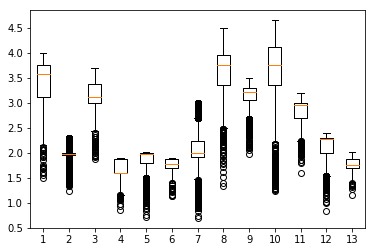

In [553]:
produkt_cena = [df['cena'][df['produkt']==p] for p in df['produkt'].unique()]
plt.boxplot(produkt_cena)
plt.show()

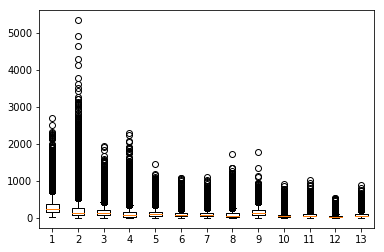

In [184]:
produkt_sprzedaz = [df['sprzedaz'][df['produkt']==p] for p in df['produkt'].unique()]
plt.boxplot(produkt_sprzedaz)
plt.show()

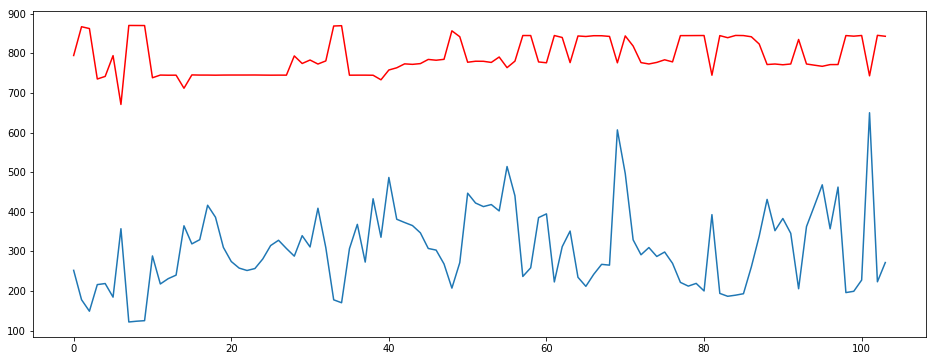

In [171]:
fig, ax = plt.subplots()
ax.plot(range(104), p1s211.groupby('tydzien')['cena'].mean() * 250, color='r')
ax.plot(range(104), p1s211.groupby('tydzien')['sprzedaz'].mean())
fig.set_size_inches([16, 6])

In [238]:
pca = PCA(n_components=150)

In [152]:
weeks = df['tydzien'].unique()
products = df['produkt'].unique()
shops = df['sklep'].unique()
pw = []
for p in products:
    shops_week = [df[(df['tydzien']==week) & (df['produkt']=='p1')]['sklep'].unique().shape[0] for week in weeks]
    pw.append(shops_week)

In [143]:
pw = np.array(pw)
for i in range(13):
    print(np.unique(pw[i, 0]!=343))

[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]


In [176]:
sales = p1.groupby(by='tydzien')['sprzedaz'].sum()[1:]
p1df['sprzedaz'] = sales.values

In [188]:
p1df.to_csv('p1.csv', index=False)

In [ ]:
lab_sklep = LabelEncoder()
lab_sklep.fit(df['sklep'])
sklepy = lab_sklep.transform(df['sklep'])

lab_produkt = LabelEncoder()
lab_produkt.fit(df['produkt'])
produkty = lab_produkt.transform(df['produkt'])

df['produkt'] = produkty
df['sklep'] = sklepy

df.head()

In [ ]:
p1.head()

In [ ]:
ps = {}
for p in np.unique(df['produkt']):
    for s in np.unique(df['sklep']):
        ps['p'+str(p)+'s'+str(s)] = df[(df['produkt']==p) & (df['sklep']==s)]

In [ ]:
p1 = df[df['produkt']==0].drop(columns=['produkt', 'sklep'])

p1typ = p1.iloc[:, [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
p1typ = p1typ.groupby(by='tydzien').sum()

p1nr = p1.groupby(by='tydzien').mean()

pp1 = p1.groupby(by='tydzien')['sprzedaz', 'cena'].mean()
pp1[p1typ.columns] = p1typ

#pp1['nr_tyg'] = p1nr['nr_tyg']

In [ ]:
p1 = df[df['produkt']==0].drop(columns=['produkt', 'sklep'])

p1typ = p1.iloc[:, [1, 4, 5, 6, 7, 8, 9, 10, 11, 12]].groupby(by='tydzien').sum()

p1nrtyg = p1.groupby(by='tydzien').mean()[['nr_tyg']]

pp1 = p1.groupby(by='tydzien')['sprzedaz', 'cena'].mean()

pp1[p1typ.columns] = p1typ

pp1['nr_tyg'] = p1nrtyg


In [ ]:
X = pp1.iloc[:, 1:].values
y = pp1.iloc[:, 0].values

reg = LinearRegression(n_jobs=-1)
reg.fit(pca.transform(X), y)
y_pred_train = reg.predict(pca.transform(X))
y_pred_train[y_pred_train < 0] = 0

"""y_pred_test = reg.predict(X_test)
y_pred_test[y_pred_test < 0] = 0"""


fig, ax = plt.subplots()
ax.plot(range(104), y)
ax.plot(range(104), y_pred_train)
#ax.plot(p1s211['tydzien'][100:], y_pred_test)
fig.set_size_inches([16, 6])
plt.show()
print('MAPE_train: %.2f' % (mape(y, y_pred_train)))
#print('MAPE_test: %.2f' % (mape(y, y_pred_test)))

In [352]:
X = pp1.iloc[:, 1:].values
y = pp1.iloc[:, 0].values

In [351]:
X

array([[96.,  1.,  0., ...,  0.,  0., 33.],
       [12.,  1.,  0., ...,  2.,  0., 34.],
       [11.,  0.,  0., ...,  0.,  0., 35.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0., 30.],
       [ 0.,  0.,  0., ...,  0.,  0., 31.],
       [ 0.,  0.,  0., ...,  0.,  0., 32.]])

In [212]:
ps.keys()

dict_keys(['p0s0', 'p0s1', 'p0s2', 'p0s3', 'p0s4', 'p0s5', 'p0s6', 'p0s7', 'p0s8', 'p0s9', 'p0s10', 'p0s11', 'p0s12', 'p0s13', 'p0s14', 'p0s15', 'p0s16', 'p0s17', 'p0s18', 'p0s19', 'p0s20', 'p0s21', 'p0s22', 'p0s23', 'p0s24', 'p0s25', 'p0s26', 'p0s27', 'p0s28', 'p0s29', 'p0s30', 'p0s31', 'p0s32', 'p0s33', 'p0s34', 'p0s35', 'p0s36', 'p0s37', 'p0s38', 'p0s39', 'p0s40', 'p0s41', 'p0s42', 'p0s43', 'p0s44', 'p0s45', 'p0s46', 'p0s47', 'p0s48', 'p0s49', 'p0s50', 'p0s51', 'p0s52', 'p0s53', 'p0s54', 'p0s55', 'p0s56', 'p0s57', 'p0s58', 'p0s59', 'p0s60', 'p0s61', 'p0s62', 'p0s63', 'p0s64', 'p0s65', 'p0s66', 'p0s67', 'p0s68', 'p0s69', 'p0s70', 'p0s71', 'p0s72', 'p0s73', 'p0s74', 'p0s75', 'p0s76', 'p0s77', 'p0s78', 'p0s79', 'p0s80', 'p0s81', 'p0s82', 'p0s83', 'p0s84', 'p0s85', 'p0s86', 'p0s87', 'p0s88', 'p0s89', 'p0s90', 'p0s91', 'p0s92', 'p0s93', 'p0s94', 'p0s95', 'p0s96', 'p0s97', 'p0s98', 'p0s99', 'p0s100', 'p0s101', 'p0s102', 'p0s103', 'p0s104', 'p0s105', 'p0s106', 'p0s107', 'p0s108', 'p0s109',

In [198]:
#p1s211 = df[(df['sklep']=='s211') & (df['produkt']=='p1')]
p1s211 = df[df['produkt']=='p1']


In [134]:
p1s211.head()

,sprzedaz,produkt,sklep,tydzien,nr_tyg,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
15703,99.0,p1,s3,2017-08-17,33,3.175455,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9775,242.0,p1,s34,2017-08-17,33,3.180744,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5511,602.0,p1,s84,2017-08-17,33,3.163555,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15807,202.0,p1,s252,2017-08-17,33,3.169406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3015,435.0,p1,s307,2017-08-17,33,3.093448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
lab = LabelEncoder()
lab.fit(p1s211['sklep'])
sklepy = lab.transform(p1s211['sklep'])
p1s211['sklep'] = sklepy
display(p1s211.head())
X = p1s211.iloc[:, [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]].values
y = p1s211.iloc[:, 0].values
ohe = OneHotEncoder(categorical_features=[0], sparse=False)
ohe.fit(X)
X = ohe.transform(X)
X_train = X
X_test = X
y_train = y
y_test = y

C:\Users\Mikolaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,sprzedaz,produkt,sklep,tydzien,nr_tyg,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
15703,99.0,p1,222,2017-08-17,33,3.175455,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9775,242.0,p1,267,2017-08-17,33,3.180744,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5511,602.0,p1,326,2017-08-17,33,3.163555,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15807,202.0,p1,170,2017-08-17,33,3.169406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3015,435.0,p1,231,2017-08-17,33,3.093448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\Mikolaj\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Mikolaj\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [173]:
X_train.shape

(35721, 354)

In [174]:
35721 / 346

103.23988439306359

In [176]:
reg = LinearRegression(n_jobs=-1)
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_train[y_pred_train < 0] = 0

y_pred_test = reg.predict(X_test)
y_pred_test[y_pred_test < 0] = 0

"""
fig, ax = plt.subplots()
ax.plot(p1s211['tydzien'], y)
ax.plot(p1s211['tydzien'][0:100], y_pred_train)
ax.plot(p1s211['tydzien'][100:], y_pred_test)
fig.set_size_inches([16, 6])
plt.show()
"""
print('MAPE_train: %.2f' % (mape(y, y_pred_train)))
print('MAPE_test: %.2f' % (mape(y, y_pred_test)))

MAPE_train: 32.21
MAPE_test: 32.21


In [181]:
forest = RandomForestRegressor(max_depth=5, n_estimators=100, n_jobs=-1)
forest.fit(X_train, y_train)

y_pred_train = forest.predict(X_train)
y_pred_train[y_pred_train < 0] = 0

y_pred_test = forest.predict(X_test)
y_pred_test[y_pred_test < 0] = 0

"""fig, ax = plt.subplots()
ax.plot(p1s211['tydzien'], y)
ax.plot(p1s211['tydzien'][0:100], y_pred_train)
ax.plot(p1s211['tydzien'][100:], y_pred_test)
fig.set_size_inches([16, 6])
plt.show()"""
print('MAPE_train: %.2f' % (mape(y, y_pred_train)))
print('MAPE_test: %.2f' % (mape(y, y_pred_test)))

MAPE_train: 56.01
MAPE_test: 56.01


In [97]:
y_test.shape

(3,)

In [183]:
gb = GradientBoostingRegressor(max_depth=4)
gb.fit(X_train, y_train)

y_pred_train = gb.predict(X_train)
y_pred_train[y_pred_train < 0] = 0

y_pred_test = gb.predict(X_test)
y_pred_test[y_pred_test < 0] = 0

"""fig, ax = plt.subplots()
ax.plot(p1s211['tydzien'], y)
ax.plot(p1s211['tydzien'][0:100], y_pred_train)
ax.plot(p1s211['tydzien'][100:], y_pred_test)
fig.set_size_inches([16, 6])
plt.show()
"""
print('MAPE_train: %.2f' % (mape(y, y_pred_train)))
print('MAPE_test: %.2f' % (mape(y, y_pred_test)))

MAPE_train: 48.67
MAPE_test: 48.67


### Model regresja liniowa

#### zmienne dzień, tydzień w roku, miesiąc, rok

In [566]:
df.head(n=2)
#df.tail()
#df = df.sort_values(by='tydzien')

,sprzedaz,produkt,sklep,tydzien,nr_tyg,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
261351,97.0,p8,s29,2017-08-17,33,2.672680,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
258335,202.0,p8,s234,2017-08-17,33,2.586931,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [289]:
days = [date.day for date in df['tydzien']]
weeks = [date.week for date in df['tydzien']]
months = [date.month for date in df['tydzien']]
years = [date.year for date in df['tydzien']]

In [290]:
weeks = [date.week for date in df['tydzien']]
df.insert(column='nr_tyg', loc=4, value=weeks)
#df.insert(column='miesiac', loc=5, value=months)
#df.insert(column='rok', loc=6, value=years)

In [457]:
#df = df.drop(columns=['tydzien'])
df.head()

,sprzedaz,produkt,sklep,tydzien,nr_tyg,miesiac,rok,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
0,608.0,p1,s211,2017-08-24,34,8,2017,3.465428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,548.0,p1,s211,2017-08-31,35,8,2017,3.374708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1062.0,p1,s211,2017-09-07,36,9,2017,2.904812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,895.0,p1,s211,2017-09-14,37,9,2017,2.956179,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,768.0,p1,s211,2017-09-21,38,9,2017,3.172201,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [458]:
lab = LabelEncoder()

lab.fit(df['produkt'])
produkty = lab.transform(df['produkt'])

lab.fit(df['sklep'])
sklepy = lab.transform(df['sklep'])

'''
lab.fit(df['miesiac'])
miesiace = lab.transform(df['miesiac'])

lab.fit(df['rok'])
lata = lab.transform(df['rok'])

lab.fit(df['nr_tyg'])
tygodnie = lab.transform(df['nr_tyg'])
'''

"\nlab.fit(df['miesiac'])\nmiesiace = lab.transform(df['miesiac'])\n\nlab.fit(df['rok'])\nlata = lab.transform(df['rok'])\n\nlab.fit(df['nr_tyg'])\ntygodnie = lab.transform(df['nr_tyg'])\n"

In [459]:
df['produkt'] = produkty
df['sklep'] = sklepy

'''
df['miesiac'] = miesiace
df['rok'] = lata
df['tygodnie'] = tygodnie
'''

"\ndf['miesiac'] = miesiace\ndf['rok'] = lata\ndf['tygodnie'] = tygodnie\n"

In [460]:
df.head()

,sprzedaz,produkt,sklep,tydzien,nr_tyg,miesiac,rok,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
0,608.0,0,125,2017-08-24,34,8,2017,3.465428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,548.0,0,125,2017-08-31,35,8,2017,3.374708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1062.0,0,125,2017-09-07,36,9,2017,2.904812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,895.0,0,125,2017-09-14,37,9,2017,2.956179,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,768.0,0,125,2017-09-21,38,9,2017,3.172201,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [463]:
df = df.sort_values(by='tydzien')
df.head()

,sprzedaz,produkt,sklep,tydzien,nr_tyg,miesiac,rok,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
110551,289.0,7,314,2017-08-17,33,8,2017,3.146194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160367,42.0,8,55,2017-08-17,33,8,2017,2.990000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16431,102.0,0,174,2017-08-17,33,8,2017,3.161961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160471,36.0,8,151,2017-08-17,33,8,2017,2.990000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
368471,18.0,3,186,2017-08-17,33,8,2017,1.790000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [393]:
X = df.values[:, 1:]
y = df.values[:, 0]

In [424]:
jj = df[(df['produkt']==1) & (df['sklep']==2)]

In [425]:
X = jj.values[:, 1:]
y = jj.values[:, 0]

In [426]:
ohe = OneHotEncoder(categorical_features=[0, 1, 2, 3])
ohe.fit(X)
X = ohe.transform(X)

C:\Users\Mikolaj\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Mikolaj\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [427]:
reg = LinearRegression(n_jobs=-1)
reg.fit(X, y)
reg.score(X, y)


0.7863106536544437

In [198]:
def mape(y_true, y_pred):
    errs = np.sqrt(np.power(((y_true - y_pred) / y_true), 2))
    mean = (np.sum(errs) / errs.shape[0]) * 100
    return mean

In [429]:
y_pred = reg.predict(X)
y_pred[y_pred < 0] = 0
mape(y, y_pred)

18.1492820734001

In [343]:
pd.Categorical(df['produkt'], categories=df['produkt'].unique().codes())

AttributeError: 'numpy.ndarray' object has no attribute 'codes'

In [432]:
forest = RandomForestRegressor(max_depth=None, n_estimators=100, n_jobs=-1)
forest.fit(X, y)
y_pred = forest.predict(X)
y_pred[y_pred < 0] = 0
mape(y, y_pred)

9.891655792463428

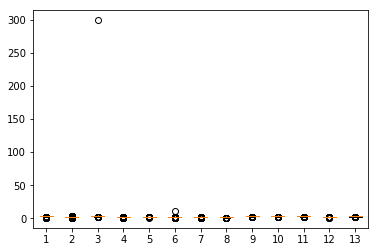

In [465]:
produkt_cena = [df['cena'][df['produkt']==p] for p in df['produkt'].unique()]
plt.boxplot(produkt_cena)
plt.show()

In [112]:
df=df.drop([227])


In [114]:
df=df.drop([413397])

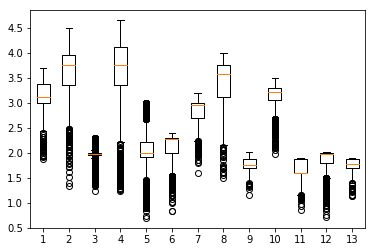

In [115]:
produkt_cena = [df['cena'][df['produkt']==p] for p in df['produkt'].unique()]
plt.boxplot(produkt_cena)
plt.show()

In [136]:
p1_s211 = df[(df['produkt']=='p1') & (df['sklep']=='s211')]
p1_s211 = p1_s211.sort_values(by='tydzien')

In [138]:
p1_s211.shape[0]

103

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

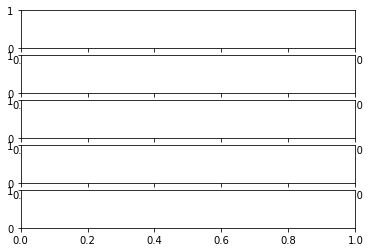

In [186]:
fig, ax = plt.subplots(nrows=13)
ax.plot(range(p1_s211.shape[0]), p1_s211['cena'] * 1000)
ax.plot(range(p1_s211.shape[0]), p1_s211['sprzedaz'])
fig.set_size_inches([12, 4])
plt.show()

In [230]:
df.head()

,produkt,sklep,Tydzień,sprzedaż (szt.),cena,ekspozycja TYP1,ekspozycja TYP2,ekspozycja TYP3,ekspozycja TYP4,ekspozycja TYP5,ekspozycja TYP6,ekspozycja TYP7,ekspozycja TYP8,ekspozycja TYP9
0,p1,s211,2017-08-24,608,3.46543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,p1,s211,2017-08-31,548,3.37471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,p1,s211,2017-09-07,1062,2.90481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,p1,s211,2017-09-14,895,2.95618,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,p1,s211,2017-09-21,768,3.1722,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
scaler = StandardScaler()
c = p1_s211['cena'].values.reshape(-1, 1)
scaler.fit(c)
c_norm = scaler.transform(c)

In [179]:
scaler = StandardScaler()
s = p1_s211['sprzedaz'].values.reshape(-1, 1)
scaler.fit(c)
s_norm = scaler.transform(s)

C:\Users\Mikolaj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


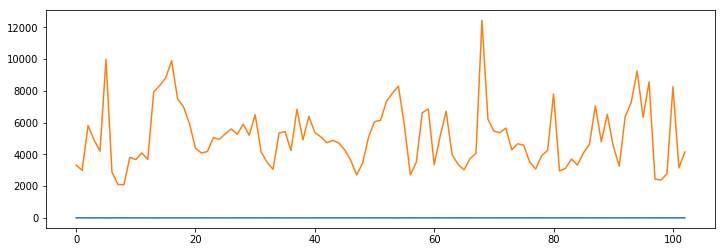

In [180]:
fig, ax = plt.subplots()
ax.plot(range(p1_s211.shape[0]), c_norm)
ax.plot(range(p1_s211.shape[0]), s_norm)
fig.set_size_inches([12, 4])
plt.show()

In [129]:
p1 = df['produkt']=='p1'
s211 = df['sklep']=='s211'
np.all(p1.values, s211.values)

TypeError: only integer scalar arrays can be converted to a scalar index

In [212]:
for i in range(1, 10):
    a = np.unique(np.array((df['typ'+str(i)]).values, dtype=int))
    print('typ'+str(i)+':', a)

typ1: [0 1 2 3 4 5 6]
typ2: [-2  0  1  2  3  4  5]
typ3: [0 1 2 3 5]
typ4: [0 1 2 3 4]
typ5: [0 1 2 3]
typ6: [0 1 2 3 4 5 6 7 8 9]
typ7: [0 1 2 3 4 5 6 9]
typ8: [0 1 2 3 4]
typ9: [ 0  1  2  3  4  5  6  7  8  9 10]


In [208]:
np.array([1, 2, 0.2, -1, 0.7], dtype=int)

array([ 1,  2,  0, -1,  0])

In [17]:
p1_df = df[df['produkt']=='p1']
p1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35775 entries, 0 to 35774
Data columns (total 14 columns):
sprzedaz    35775 non-null int64
produkt     35775 non-null object
sklep       35775 non-null object
tydzien     35775 non-null datetime64[ns]
cena        35775 non-null float64
typ1        35775 non-null float64
typ2        35775 non-null float64
typ3        35775 non-null float64
typ4        35775 non-null float64
typ5        35775 non-null float64
typ6        35775 non-null float64
typ7        35775 non-null float64
typ8        35775 non-null float64
typ9        35775 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(1), object(2)
memory usage: 4.1+ MB


In [25]:
aggr_p1 = p1_df.groupby(by='tydzien').sum()
aggr_p1

,sprzedaz,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
tydzien,,,,,,,,,,,
2017-08-17,86436,1090.437021,96.00,1.0,0.0,0.0,1.0,52.00,0.00,0.0,0.0
2017-08-24,61166,1193.664246,12.00,1.0,0.0,0.0,1.0,10.00,0.00,2.0,0.0
2017-08-31,51177,1187.326955,11.00,0.0,0.0,0.0,0.0,2.00,0.00,0.0,0.0
2017-09-07,74299,1012.086711,43.60,2.0,0.0,0.0,1.0,4.00,0.00,0.0,0.0
2017-09-14,75341,1020.937134,49.10,1.0,0.0,1.0,0.0,73.00,0.00,0.0,0.0
2017-09-21,63403,1093.188911,87.00,0.0,0.0,0.0,0.0,65.00,0.00,0.0,0.0
2017-09-28,123176,923.409974,98.25,0.0,0.0,0.0,0.0,101.00,0.00,2.0,0.0
2017-10-05,41813,1198.037121,2.00,0.0,0.0,0.0,0.0,2.00,0.00,0.0,0.0
2017-10-12,42600,1197.929190,6.10,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0


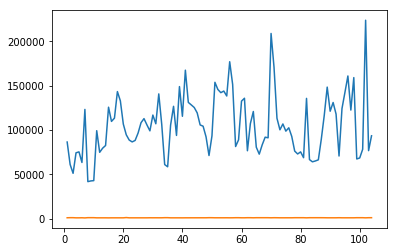

In [30]:
plt.plot(range(1, 105), aggr_p1['sprzedaz'])
plt.plot(range(1, 105), aggr_p1['cena'])


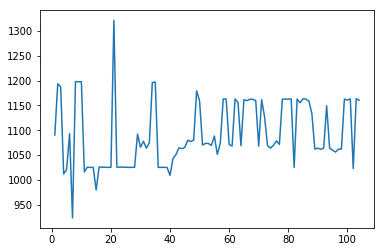

In [31]:
plt.plot(range(1, 105), aggr_p1['cena'])

ValueError: x and y must have same first dimension, but have shapes (104,) and (208,)

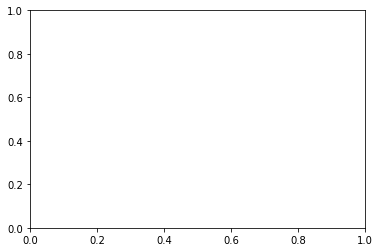

In [39]:
s149 = p1_df[p1_df['sklep']=='s149']
plt.plot(range(1, 105), s149['sprzedaz'])
plt.plot(range(1, 105), s149['cena'])

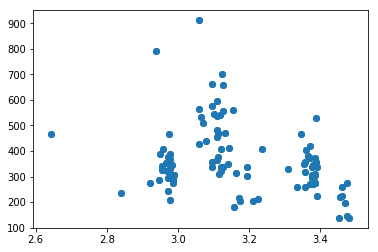

In [43]:
plt.scatter(s149['cena'], s149['sprzedaz'])


In [217]:
lab = LabelEncoder()

lab.fit(df['produkt'])
produkty = lab.transform(df['produkt'])

lab.fit(df['sklep'])
sklepy = lab.transform(df['sklep'])

In [218]:
df['produkt'] = produkty
df['sklep'] = sklepy

In [219]:
df.head(n=2)

,sprzedaz,produkt,sklep,tydzien,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
0,608,0,125,2017-08-24,3.46543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,548,0,125,2017-08-31,3.37471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [220]:
for i in range(1,10):
    print(df['typ'+str(i)].unique(), '\n')

[0.   1.   2.   3.   4.   5.   1.1  0.6  0.75 0.5  1.25 0.7  0.25 1.5
 1.3  1.2  6.   0.34 0.8  0.3  2.2  2.5  0.16] 

[ 0.    1.    5.    2.    0.5   3.    1.5   4.    0.25 -2.  ] 

[0.   1.   0.5  2.   1.5  3.   0.7  0.42 0.34 0.17 2.5  0.3  0.25 1.8
 5.   0.08] 

[0.   1.   2.   3.   0.5  0.17 4.   1.5  0.25 1.3  1.32 0.34 0.33] 

[0.   1.   2.   3.   0.5  0.59 0.8 ] 

[0.   3.   1.   2.   4.   0.17 5.   0.6  0.5  6.   1.5  1.25 0.7  1.8
 1.4  2.5  8.   9.   0.2  1.2  0.8  0.75 0.3  0.25 1.3  1.7  0.4  3.5
 5.5  7.   0.1  2.8 ] 

[0.   1.   2.   6.   3.   4.   0.75 0.7  1.5  1.25 0.3  1.75 2.5  1.2
 1.7  0.6  0.8  0.5  5.   5.5  1.8  1.4  0.25 0.4  0.2  3.5  9.5  3.69
 0.66] 

[0.   1.   2.   0.5  0.25 3.   4.  ] 

[ 0.    1.    4.   10.    3.    6.    5.    2.    8.    7.    9.    1.79] 



In [221]:
ohe = OneHotEncoder(categories='auto', sparse=False)
a = ohe.fit_transform(df[['produkt', 'sklep']])

In [222]:
days = [date.day for date in df['tydzien']]
weeks = [date.week for date in df['tydzien']]
months = [date.month for date in df['tydzien']]
years = [date.year for date in df['tydzien']]

In [223]:
df.insert(column='nr_tyg', loc=3, value=weeks)

In [224]:
df.head(n=2)

,sprzedaz,produkt,sklep,nr_tyg,tydzien,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
0,608,0,125,34,2017-08-24,3.46543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,548,0,125,35,2017-08-31,3.37471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [241]:
X = df.drop(columns=['sprzedaz', 'tydzien', 'produkt', 'sklep']).values
y = df['sprzedaz'].values

In [202]:
X = np.hstack([a, X])

In [276]:
display(X)

array([[34, 3.46542763157895, 0.0, ..., 0.0, 0.0, 0.0],
       [35, 3.37470802919708, 0.0, ..., 0.0, 0.0, 0.0],
       [36, 2.90481167608286, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       [30, 1.28659090909091, 0.0, ..., 0.0, 0.0, 0.0],
       [31, 1.38065217391304, 0.0, ..., 0.0, 0.0, 0.0],
       [32, 1.83375, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [299]:
s = df['sprzedaz']=='.'
df[s]


,sprzedaz,produkt,sklep,nr_tyg,tydzien,cena,typ1,typ2,typ3,typ4,typ5,typ6,typ7,typ8,typ9
413479,.,4,57,9,2019-02-28,1.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [267]:
np.array(types)[0].dtype

AttributeError: type object 'float' has no attribute 'dtype'

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [212]:
X_train = np.array(X_train[], dtype='float64')

ValueError: could not convert string to float: '1,69'

In [210]:
rf = RandomForestRegressor(max_depth=5)
rf.fit(X_train, y_train)

C:\Users\Mikolaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: '1,69'

In [242]:
df['tydzien'][0]

Timestamp('2017-08-24 00:00:00')

In [245]:
df['tydzien'][103]

Timestamp('2017-08-17 00:00:00')